In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# E-commerce Market Trends in Olist Company
This is a ecommerce public dataset of orders made at Olist Store.  
The dataset has information of 100k orders made at multiple marketplaces in Brazil. 
Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.


In [2]:
customer_data = pd.read_csv(r"C:\Users\cs763\Downloads\olist_customers_dataset.csv")
orders_item_data= pd.read_csv(r"C:\Users\cs763\Downloads\olist_order_items_dataset.csv")
orders_payment_data = pd.read_csv(r"C:\Users\cs763\Downloads\olist_order_payments_dataset.csv")
geolocation_data = pd.read_csv(r"C:\Users\cs763\Downloads\olist_geolocation_dataset.csv")
orders_review_data = pd.read_csv(r"C:\Users\cs763\Downloads\olist_order_reviews_dataset.csv")
orders_data = pd.read_csv(r"C:\Users\cs763\Downloads\olist_orders_dataset.csv")
product_data = pd.read_csv(r"C:\Users\cs763\Downloads\olist_products_dataset.csv")
product_category_data= pd.read_csv(r"C:\Users\cs763\Downloads\product_category_name_translation.csv")
sellers_data= pd.read_csv(r"C:\Users\cs763\Downloads\olist_sellers_dataset.csv")

In [3]:
customer_data.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25735,b4e75503e84a8d6d68d2ca27d627f085,c9a96a438d1a1bc273193daa8d9a74a9,7791,cajamar,SP
18410,b21abdbd6175139c4e9b66ee64f9c87a,2ef4b953c1f651288a3373f143d478a7,18540,porto feliz,SP


In [4]:
orders_item_data.sample(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
17588,28522593d073f4f1738c608a4326ca7e,1,6002665d65ee348dcd357c7bb2f080bd,f45122a9ab94eb4f3f8953578bc0c560,2017-05-18 12:32:08,59.99,17.67
23063,34ae480fe2cec3fa921d33b72b32572a,3,e932008cf0ea7c93a077dd8d7e5f49eb,fcdd820084f17e9982427971e4e9d47f,2018-08-21 02:50:04,190.00,17.66


In [5]:
orders_data.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
58986,8791ee44f46577057a684a381d2ded13,0300ae7800b82af58b1f3526991cd98d,delivered,2018-06-25 23:33:24,2018-06-26 00:35:20,2018-06-26 15:53:00,2018-06-29 17:51:10,2018-07-19 00:00:00
18926,fe8557bac7755475950823aa9b15ebb3,e3f74d4cbb4beec5b8b77095cd256b99,delivered,2018-05-12 22:43:27,2018-05-12 22:55:09,2018-05-15 07:55:00,2018-05-16 18:05:29,2018-05-25 00:00:00


In [6]:
orders_payment_data.sample(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
70635,ec65679b4c5a964591180c6066177c5d,1,credit_card,5,128.2
76444,98d069c561ebb323c7a43ec817b36dd4,1,credit_card,4,212.1


In [7]:
geolocation_data.sample(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
9735,1323,-23.563601,-46.640969,são paulo,SP
507650,27510,-22.461695,-44.462191,resende,RJ


In [8]:
orders_review_data.sample(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25294,8bbf22e74821dbab8a1177988c3870e1,5f3c3f02ee527647eadaeab108a89f51,1,produto não recebido,Boa tarde\r\n\r\nRecebi o tapete de eva e não ...,2018-08-18 00:00:00,2018-08-21 16:04:45
98761,d415a5a313d6e634b0f3b081c1989545,65b9fc7c003b0fa663d00ae47abbf012,5,NaN,Ainda não recebi a blusa na entrega,2017-11-03 00:00:00,2017-11-05 14:27:23


In [9]:
product_data.sample(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
28194,eace264775d7cb8c0ec565d7746f661c,cama_mesa_banho,49.0,773.0,1.0,400.0,20.0,10.0,20.0
9066,1be9435dc0c47cf6b58c34d3bb7d6f54,cama_mesa_banho,49.0,293.0,1.0,1225.0,38.0,15.0,31.0


In [10]:
product_category_data.sample(5)

,product_category_name,product_category_name_english
65,dvds_blu_ray,dvds_blu_ray
10,alimentos_bebidas,food_drink
11,bebes,baby
26,moveis_cozinha_area_de_servico_jantar_e_jardim,kitchen_dining_laundry_garden_furniture
53,pcs,computers


In [11]:
sellers_data.sample(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
620,dc50afafdfa325eadc890c7fa42a8f4e,87050,maringa,PR
2949,8e29d051f810eb22959ede205b462b9f,15131,mirassol,SP


#                                                           Data Joining

In [12]:
data = pd.merge(customer_data,orders_data,on='customer_id',how='inner')
data = data.merge(orders_item_data,on='order_id',how='inner')
data = data.merge(orders_payment_data,on='order_id',how='inner')
data = data.merge(orders_review_data,on='order_id',how='inner')
data = data.merge(product_data,on='product_id',how='inner')
data = data.merge(product_category_data,on='product_category_name',how='inner')
data = data.merge(sellers_data,on='seller_id',how='inner')

In [13]:
data.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
69319,fadc97febab65183a4d0f43324de83dd,b9c8333aa3dcaff68839b583f880397e,29121,vila velha,ES,92f53cdbef0f16b315c62faa337c4672,delivered,2018-07-24 15:50:40,2018-07-24 16:05:12,2018-07-25 14:21:00,...,646.0,1.0,3800.0,30.0,35.0,30.0,home_construction,3204,sao paulo,SP
111189,1c732f9f971197a78a3fbe8d68f3a336,fb08e5d25419baa8f083307b5dae8db5,9682,sao bernardo do campo,SP,6f2d341a759b59c051aa9fcbaf2dcba1,delivered,2017-11-02 16:58:37,2017-11-02 17:10:53,2017-11-04 14:32:23,...,96.0,4.0,175.0,25.0,3.0,19.0,consoles_games,6341,carapicuiba,SP
34412,ddf0bb11382100ff332835fbb45e8117,966b5b87d2d0342c86217c18ad54573f,3180,sao paulo,SP,fd6f101a1afb677198cf40cb3feb147d,delivered,2017-04-02 14:07:23,2017-04-02 14:15:13,2017-04-05 16:09:58,...,650.0,1.0,400.0,95.0,6.0,47.0,sports_leisure,4773,sao paulo,SP
107941,86b9cf04766302b8138ccbd75ce345ef,9f164e3f53fd18e7a8c25fc6856c60ca,46650,barra da estiva,BA,41bc5a3d34a8e4ef91b2e7d9500694cf,delivered,2017-06-28 17:21:02,2017-06-28 17:43:32,2017-06-30 14:28:44,...,476.0,1.0,1917.0,46.0,9.0,37.0,bed_bath_table,11720,praia grande,SP
13205,1aea733807a5066afa72c90bf8e81b15,6ddf18b326e8b5be9511ba8583c5359d,59280,macaiba,RN,59d03af4f73a43b604389724e4bf2be0,delivered,2018-06-10 20:02:36,2018-06-10 20:17:48,2018-06-13 11:02:00,...,875.0,1.0,1050.0,36.0,12.0,22.0,health_beauty,3031,sao paulo,SP
20458,560eb8573a085b95bc6c26afa74ff45b,412c581c63cce7bdcd3fc76f9b9f5350,27256,volta redonda,RJ,aa05f92f41748b3327711e6cc9ee9fc5,delivered,2017-10-02 20:56:44,2017-10-02 21:07:23,2017-10-03 19:28:18,...,116.0,1.0,1200.0,80.0,16.0,16.0,housewares,8673,suzano,SP
63822,b98974c5a4c3e37d99a4a70e5c6e99ce,54323229dc48b8282566230c887bbd49,97560,quarai,RS,0f93d63baf9f573e2d349ff7f1873f75,delivered,2018-01-17 16:54:50,2018-01-17 17:15:13,2018-01-24 11:15:47,...,200.0,3.0,6050.0,60.0,20.0,29.0,stationery,13232,campo limpo paulista,SP
114419,7544eef54d4c048f168199ed39b6698b,110fb8ecbfacd1883f0597310d5678b4,44067,feira de santana,BA,e118373a9e97e99fd3876fe78d34f501,delivered,2018-08-12 18:45:22,2018-08-13 10:15:21,2018-08-23 13:59:00,...,2290.0,5.0,250.0,16.0,9.0,11.0,musical_instruments,88056,florianopolis,SC
49251,b7164596fbd6190df097094046cd37ad,284d2eeffc71e4a5eb32b22deec74c71,75860,quirinopolis,GO,f4efba146388fcb18269422b1a903e86,delivered,2018-02-28 12:04:20,2018-03-01 11:55:35,2018-03-02 00:15:04,...,523.0,3.0,584.0,16.0,11.0,13.0,watches_gifts,14050,ribeirao preto,SP
34136,3e3fe9705a14656dceaf25cd86a7f930,2f5d3bf7f71cb155e29150536d33b30c,17051,bauru,SP,0ac907873c6fb32bfa8a58be269f0c3f,delivered,2017-07-09 20:34:20,2017-07-11 04:15:43,2017-07-11 15:39:29,...,1432.0,6.0,517.0,27.0,17.0,26.0,sports_leisure,89204,joinville,SC


In [14]:
data.shape

(115609, 40)

In [15]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [16]:
data.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808


# Imputing Data

In [17]:
data['review_comment_title'].fillna('No_comment_title',inplace=True)
data['review_comment_message'].fillna('No_comment_message',inplace=True)

In [18]:
data['product_weight_g'].fillna(data['product_weight_g'].mean(),inplace=True)
data['product_length_cm'].fillna(data['product_length_cm'].mean(),inplace=True)
data['product_height_cm'].fillna(data['product_height_cm'].mean(),inplace=True)
data['product_width_cm'].fillna(data['product_width_cm'].mean(),inplace=True)

In [19]:
data.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'],inplace=True)

In [20]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_category_nam

In [21]:
categorical_data = data.select_dtypes(include='object')
numerical_data = data.select_dtypes(include='number')

In [22]:
categorical_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'shipping_limit_date', 'payment_type',
       'review_id', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_category_name_english', 'seller_city',
       'seller_state'],
      dtype='object')

In [23]:
numerical_data.columns

Index(['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix'],
      dtype='object')

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,113194.0,35086.173984,29868.139221,1003.00,11310.00,24315.00,58865.0000,99980.00
order_item_id,113194.0,1.195063,0.687523,1.00,1.00,1.00,1.0000,21.00
price,113194.0,119.862677,181.159367,0.85,39.90,74.90,132.9800,6735.00
freight_value,113194.0,20.002657,15.711672,0.00,13.08,16.32,21.1900,409.68
payment_sequential,113194.0,1.090818,0.686671,1.00,1.00,1.00,1.0000,26.00
payment_installments,113194.0,2.943743,2.779248,0.00,1.00,2.00,4.0000,24.00
payment_value,113194.0,171.573731,264.250066,0.00,60.85,107.97,189.1575,13664.08
review_score,113194.0,4.082513,1.345920,1.00,4.00,5.00,5.0000,5.00
product_name_lenght,113194.0,48.802993,10.016149,5.00,42.00,52.00,57.0000,76.00
product_description_lenght,113194.0,784.727892,650.329422,4.00,346.00,600.00,982.0000,3992.00


In [25]:
# customer_city wise Top 10 States
x = data.groupby('customer_state')['customer_city'].count().sort_values(ascending=False)
state_wise_count_of_customers = pd.DataFrame(x)
state_wise_count_of_customers.head(10)

,customer_city
customer_state,
SP,47812
RJ,14566
MG,13216
RS,6311
PR,5790
SC,4143
BA,3844
DF,2397
GO,2305


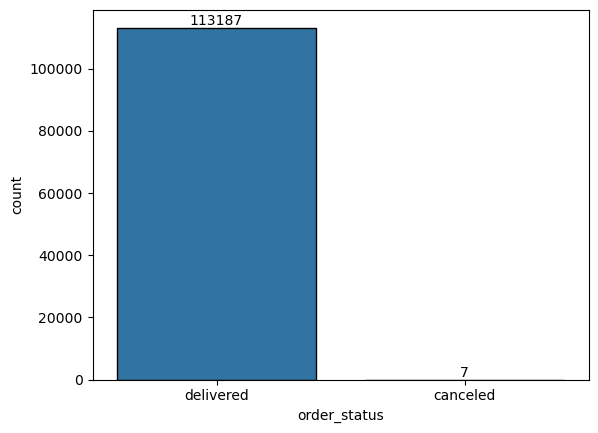

In [26]:
# Order Delivery status
ax = sb.countplot(x=data['order_status'],edgecolor='black')
for bar in ax.patches:
    ax.annotate(round(bar.get_height()),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.show()

In [27]:
# Order Status
x = data['order_status'].value_counts()
status = pd.DataFrame(x)
status

,order_status
delivered,113187
canceled,7


In [28]:
# Count of Product_category
x = data['product_category_name_english'].value_counts()
count_product_category = pd.DataFrame(x)
count_product_category

,product_category_name_english
bed_bath_table,11684
health_beauty,9749
sports_leisure,8734
furniture_decor,8554
computers_accessories,7926
...,...
arts_and_craftmanship,24
la_cuisine,15
cds_dvds_musicals,14
fashion_childrens_clothes,7


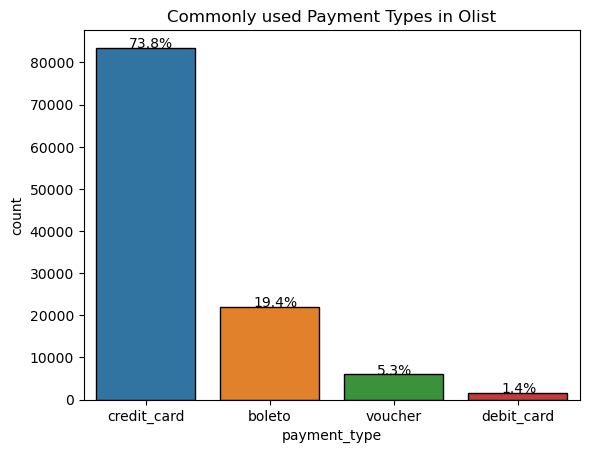

In [29]:
# Which is the most common payment type in Olist company
ax = sb.countplot(x=data['payment_type'],edgecolor='black')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['payment_type'].shape[0]*100,1)}%"
    x = bar.get_x()+bar.get_width()/3
    y = bar.get_height()
    ax.annotate(percentage,(x,y))
    plt.title('Commonly used Payment Types in Olist')
plt.show()

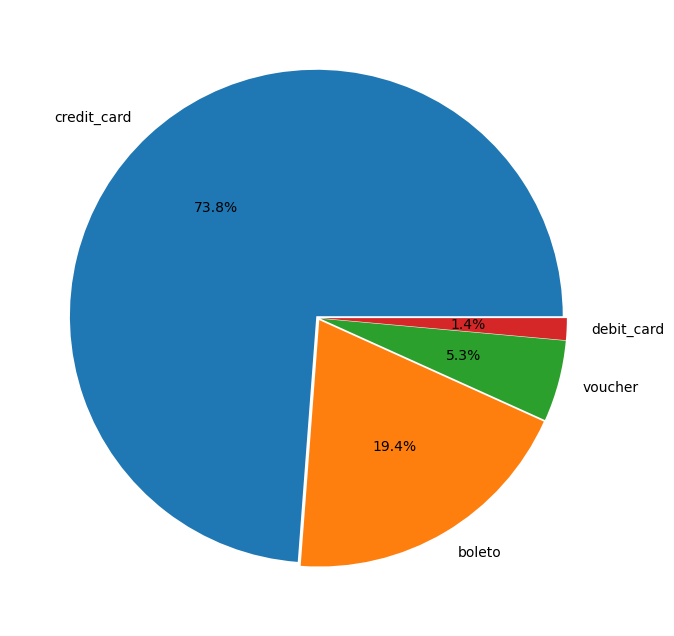

In [30]:
# Which is the most common payment type in Olist company
plt.figure(figsize=(8,8))
payment_type_count = data['payment_type'].value_counts()
payment_type_percentage = payment_type_count/payment_type_count.sum()*100
plt.pie(x=payment_type_percentage,labels=payment_type_percentage.index,autopct='%1.1f%%',explode=(0.01, 0.01, 0.01, 0.01))
plt.show()

In [31]:
# Which State have most sellers
x = data.groupby('seller_state')['seller_city'].count().sort_values(ascending=False)
state_wise_sellers = pd.DataFrame(x)
state_wise_sellers

,seller_city
seller_state,
SP,80728
MG,8793
PR,8756
RJ,4779
SC,4147
RS,2195
DF,920
BA,679
GO,527


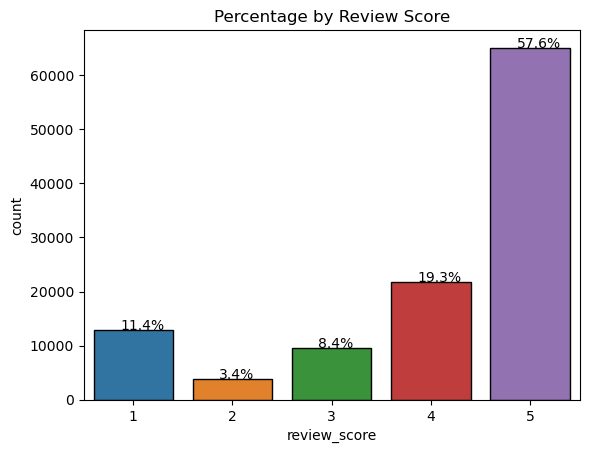

In [32]:
# Rating Score
ax = sb.countplot(x=data['review_score'],edgecolor='black')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['review_score'].shape[0]*100,1)}%"
    x = bar.get_x()+bar.get_width()/3
    y = bar.get_height()
    ax.annotate(percentage,(x,y))
    plt.title('Percentage by Review Score')
plt.show()

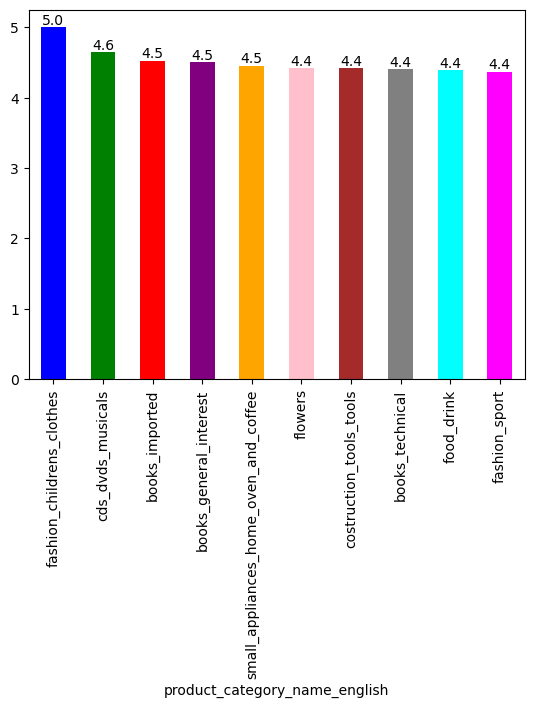

In [33]:
# Top 10 highest rated product category
x = data.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head(10)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
ax = x.plot(kind='bar',color=colors)
for bar in ax.patches:
    ax.annotate(round(bar.get_height(),1),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')

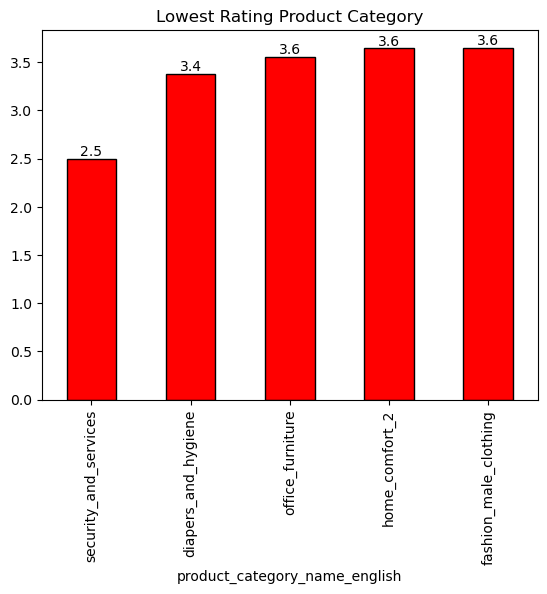

In [34]:
# Top 5 lowest rated product category
x = data.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=True).head(5)
plt.title('Lowest Rating Product Category')
ax = x.plot(kind='bar',edgecolor='black',color='red')
for bar in ax.patches:
    ax.annotate(round(bar.get_height(),1),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')

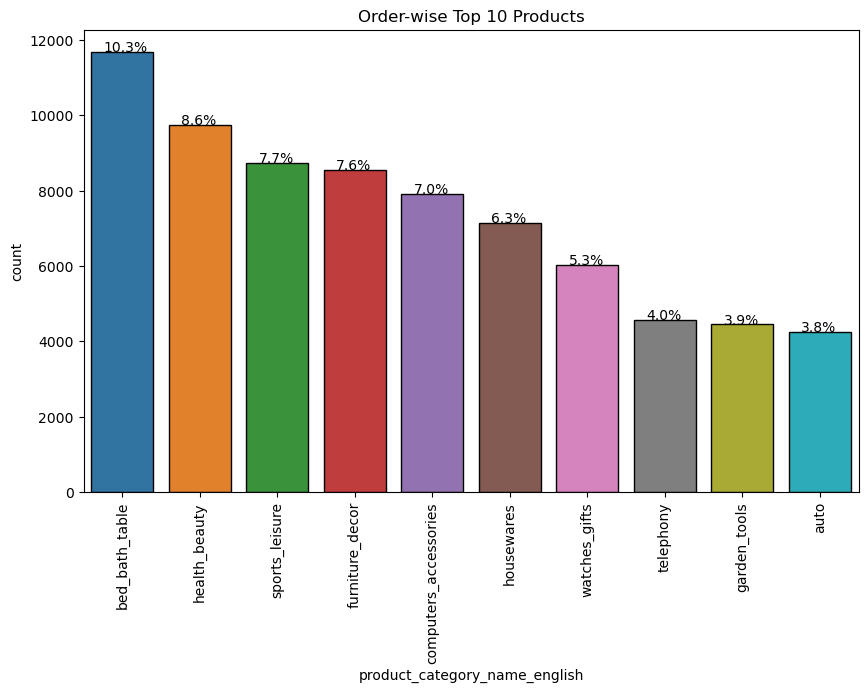

In [35]:
# Order-wise Top 10 products
plt.figure(figsize=(10,6))
ax = sb.countplot(x=data['product_category_name_english'],order=data['product_category_name_english'].value_counts().index[:10],edgecolor='black')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['product_category_name_english'].shape[0]*100,1)}%"
    x = bar.get_x()+bar.get_width()/5
    y = bar.get_height()
    ax.annotate(percentage,(x,y))
    plt.title('Order-wise Top 10 Products')
plt.xticks(rotation = 90)
plt.show()

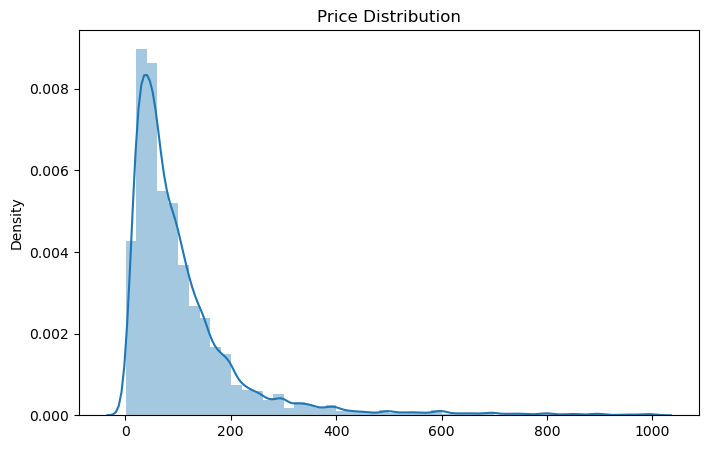

In [36]:
plt.figure(figsize=(8,5))
x =data[data['price']<1000]
sb.distplot(x=x['price'])
plt.title('Price Distribution')
plt.show()

<Axes: title={'center': 'Freight Charges Distribution'}, ylabel='Density'>

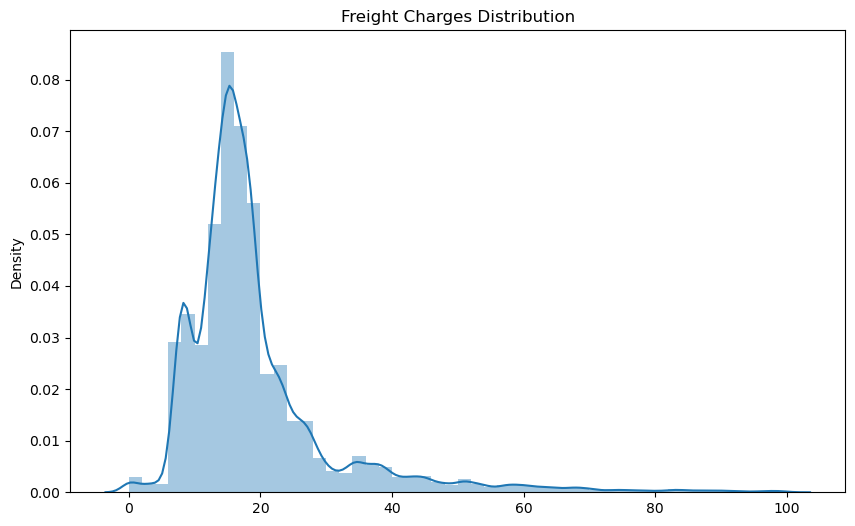

In [37]:
#Freight Charges Distribution
plt.figure(figsize=(10,6))
x = data[data['freight_value']<100]
plt.title('Freight Charges Distribution')
sb.distplot(x=x['freight_value'])

In [39]:
# converting into numerical columns
data['product_length_cm'] = pd.to_numeric(data['product_length_cm'], errors='coerce')
data['product_height_cm'] = pd.to_numeric(data['product_height_cm'], errors='coerce')
data['product_width_cm'] = pd.to_numeric(data['product_width_cm'], errors='coerce')
data['product_area']=(data['product_length_cm']*data['product_height_cm']*data['product_width_cm'])

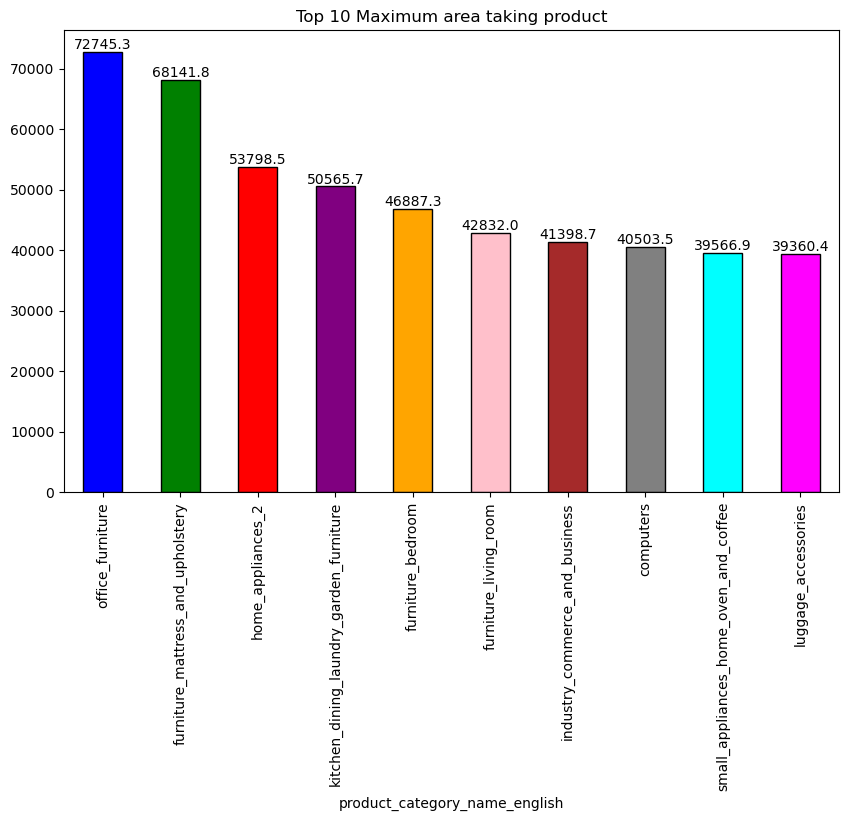

In [40]:
# Top 10 Big-size Product_category
x = round(data.groupby('product_category_name_english')['product_area'].mean(),1).sort_values(ascending=False).head(10)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.figure(figsize=(10,6))
ax = x.plot(kind='bar',color=colors,edgecolor='black')
plt.title('Top 10 Maximum area taking product')
for bar in ax.patches:
    ax.annotate(round(bar.get_height(),1),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')

# Freight price
  Price at which a certain cargo is delivered from one point to another

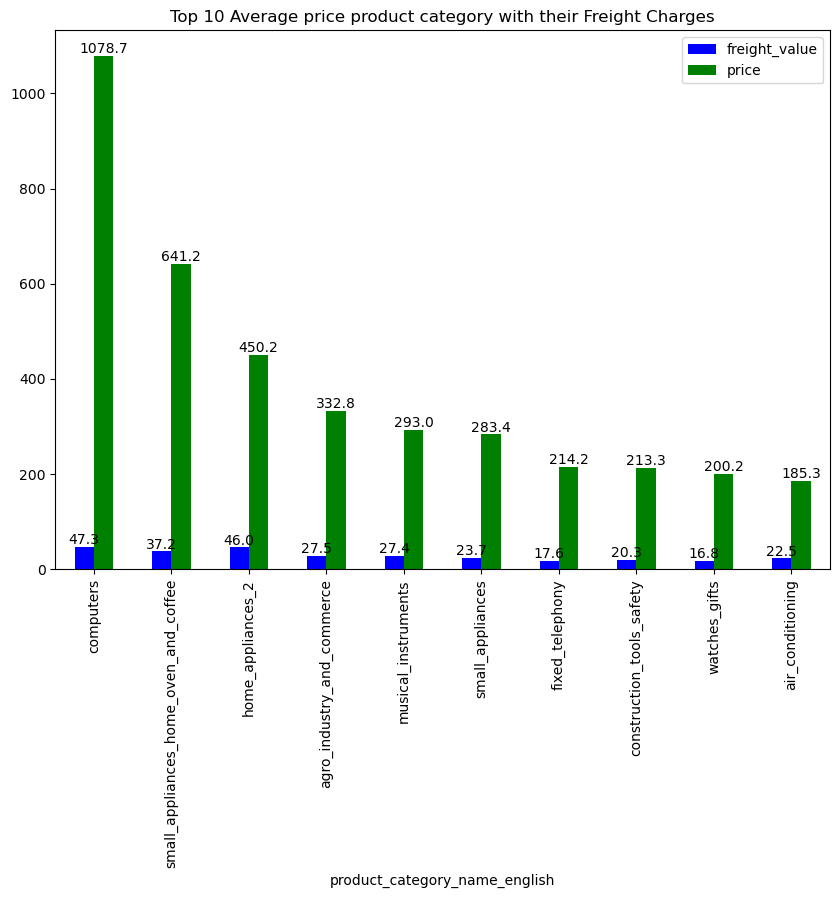

In [41]:
#Top 10 Average price product category with their Freight Charges
x = data.groupby('product_category_name_english')['freight_value','price'].mean().sort_values(by='price',ascending=False).head(10)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
ax = x.plot(kind='bar',color=colors,figsize=(10,7))
plt.title("Top 10 Average price product category with their Freight Charges")
for bar in ax.patches:
    ax.annotate(round(bar.get_height(),1),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.show()

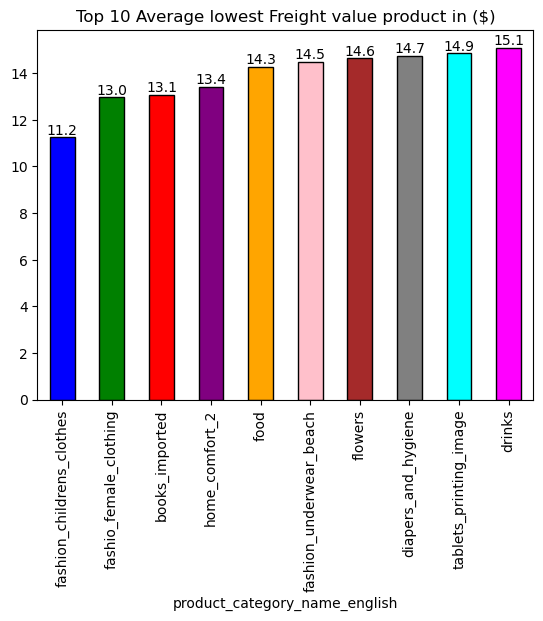

In [42]:
#Top 10 Average lowest Freight Value product category
x = data.groupby('product_category_name_english')['freight_value'].mean().sort_values(ascending=True).head(10)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
ax = x.plot(kind='bar',color=colors,edgecolor='black')
plt.title('Top 10 Average lowest Freight value product in ($)')
for bar in ax.patches:
    ax.annotate(round(bar.get_height(),1),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.show()

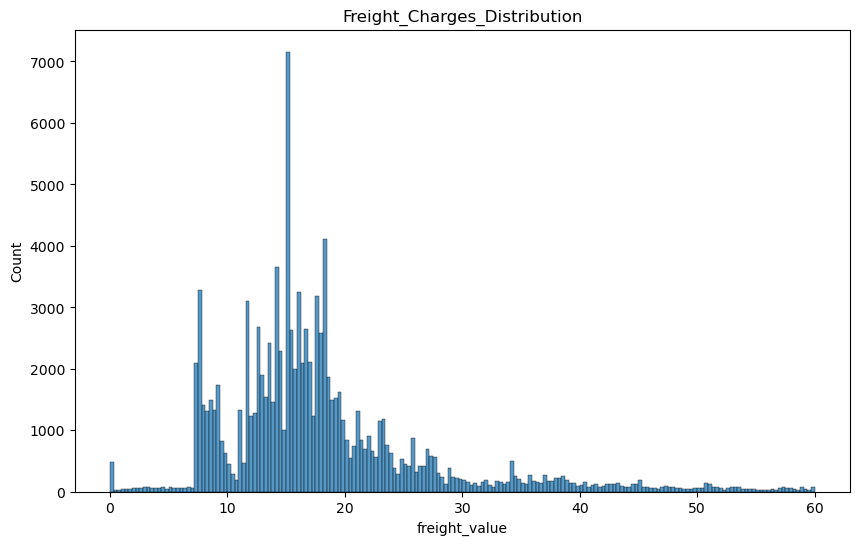

In [43]:
# Freight_charges_distribution
plt.figure(figsize=(10,6))
x = data[data['freight_value']<60]
sb.histplot(x = x['freight_value'])
plt.title('Freight_Charges_Distribution')
plt.show()

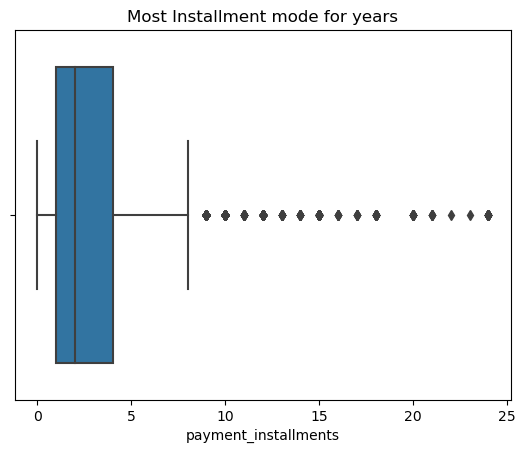

In [44]:
# For how many years have most of the installments been made
sb.boxplot(x=data['payment_installments'])
plt.title('Most Installment mode for years')
plt.show()

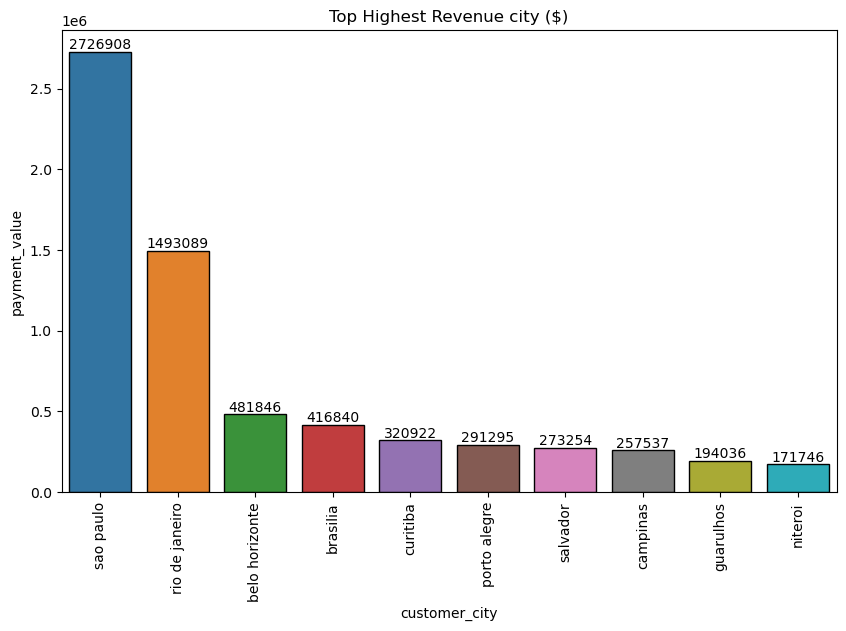

In [45]:
#Top 10 highest revenue City 
revenue_per_city = data.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
ax = sb.barplot(x='customer_city',y='payment_value',data=revenue_per_city,edgecolor='black')
for bar in ax.patches:
    ax.annotate(round(bar.get_height()),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Top Highest Revenue city ($)')
plt.xticks(rotation=90)
plt.show()

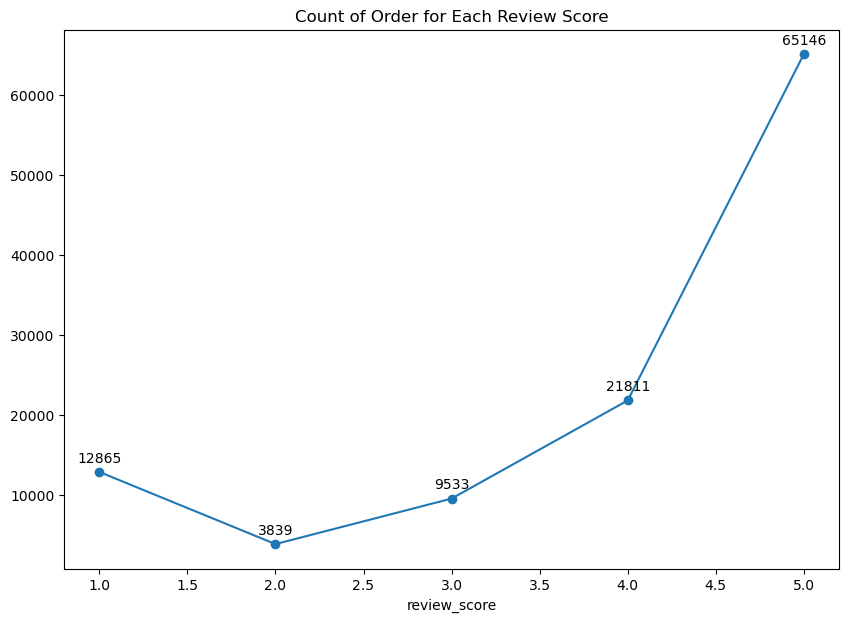

In [46]:
# Review Scores
x = data.groupby('review_score')['order_id'].count()
plt.figure(figsize=(10,7))
ax = x.plot(kind='line',marker='o')
for x_val, y_val in zip(x.index, x.values):
    ax.annotate(round(y_val, 1), (x_val, y_val), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.title('Count of Order for Each Review Score')
plt.show()

In [47]:
# Convert column to datatime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format = '%Y-%m-%d %H:%M:%S')
# Extract month and year into new columns
data['Order_purchase_month'] = data['order_purchase_timestamp'].dt.month
data['Order_purchase_year'] = data['order_purchase_timestamp'].dt.year

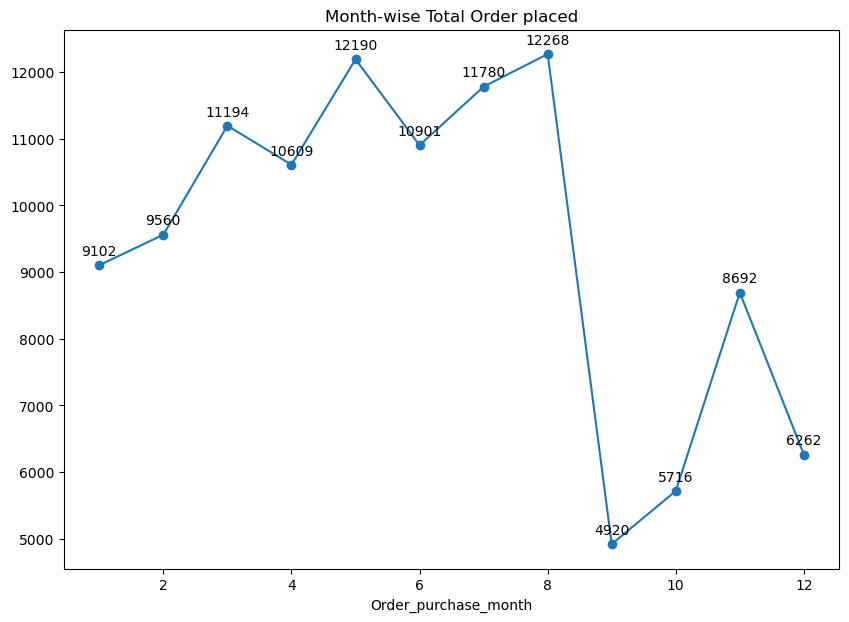

In [48]:
# Month-wise order trend
x = data.groupby('Order_purchase_month')['order_id'].count()
plt.figure(figsize=(10,7))
ax = x.plot(kind='line',marker='o')
for x_val , y_val in zip(x.index,x.values):
    ax.annotate(round(y_val,1),(x_val,y_val), ha = 'center', va='bottom', xytext=(0,5),textcoords='offset points')
plt.title('Month-wise Total Order placed')
plt.show()

# Observations
- SP state is responsible for the 66% of the Total Sales in Brazil.
- In Northern and Western region Sales are very low.
- Sao Paulo, Rio de Janerio and Belo Horizonte are the cities with highest customer capacity.
- Almost 74% customers paid through the credit card.
- BA state have the highest average sale.
- Sales get low in Q4-Q1 period.
- Bed_bath_table is the highest selling product category.
- Watches_gifts product-category have the highest Average sales.
- Security and Services have very low Sales.
- Almost 50% of the Olist customers have a one year Installment Tenure.
- Bed_bath_table, furniture_decor and houseware products are very large in size.
- The average delivery rate in SP is 8 Days which is the fastest delivery time.
- Fashion children clothes product category is rated with 5 stars.
- Computers product-category have highest Freight Charges.

# Conclusions
- Olist should focus on the Sales in Northen and Western Region with branding promotions and all.
- Freight charges in Computers and Signaling_security Product category should be less.
- RR,AP,AM,AL,PA,MA and SE states must have to reduces their delivery time and work on to increase sales.
- Security and services product category have the worst product rating which we should have to work on it and improve it.
